In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [2]:
# load the dataset

df = pd.read_csv("./titanic.csv")

In [3]:
# display the top 5 data

df.head(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# display the bottom 5 data

df.tail()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
# display the random sample

df.sample()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
760,761,0,3,"Garfirth, Mr. John",male,NaN,0,0,358585,14.5,NaN,S


In [6]:
# Display the information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [7]:
# view the description of the dataset

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [8]:
# view the missing values

print(df.isnull())

      PassengerId  Survived  Pclass   Name  Gender    Age  SibSp  Parch  \
0           False     False   False  False   False  False  False  False   
1           False     False   False  False   False  False  False  False   
2           False     False   False  False   False  False  False  False   
3           False     False   False  False   False  False  False  False   
4           False     False   False  False   False  False  False  False   
...           ...       ...     ...    ...     ...    ...    ...    ...   
1304        False     False   False  False   False   True  False  False   
1305        False     False   False  False   False  False  False  False   
1306        False     False   False  False   False  False  False  False   
1307        False     False   False  False   False   True  False  False   
1308        False     False   False  False   False   True  False  False   

      Ticket   Fare  Cabin  Embarked  
0      False  False   True     False  
1      False  False  

In [9]:
print(df.isnull().sum())

PassengerId       0
Survived          0
Pclass            0
Name              0
Gender            0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [10]:
# handling missing values of age

df["Age"].fillna(df["Age"].median(), inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_19396\1654218173.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


In [11]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_19396\122844256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


In [12]:
df["Fare"].fillna(df["Fare"].mode()[0], inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_19396\1891930464.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Fare"].fillna(df["Fare"].mode()[0], inplace=True)


In [13]:
print(df.isnull().sum())

PassengerId       0
Survived          0
Pclass            0
Name              0
Gender            0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64


In [14]:
# drop the cabin column because it has more missing values

df.drop(columns=["Cabin"], inplace=True)

In [15]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [16]:
type(df["Gender"][0])

str

In [17]:
# Encode this gender which is symmetric binary attribute
# Map the gender into Male: 1 and Female: 0

df["Gender"] = df["Gender"].map({
    "male": 1,
    "female": 0
})

In [18]:
df["Gender"][:10]

0    1
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    0
9    0
Name: Gender, dtype: int64

In [19]:
# create a new feature family size
# add sibling and spouse + parent and children + 1 for own
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

In [20]:
df["FamilySize"][:10]

0    2
1    2
2    1
3    2
4    1
5    1
6    1
7    5
8    3
9    2
Name: FamilySize, dtype: int64

In [21]:
# Create a new feature called IsAlone 

df["IsAlone"] = 1 
df["IsAlone"].loc[df["FamilySize"] > 1] = 0

C:\Users\acer\AppData\Local\Temp\ipykernel_19396\4099490399.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["IsAlone"].loc[df["FamilySize"] > 1] = 0
C:\Users\acer\AppData\Local\Temp\ipykernel_19396\4099490399.py:4: SettingWithCopyWarn

In [22]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,1,1


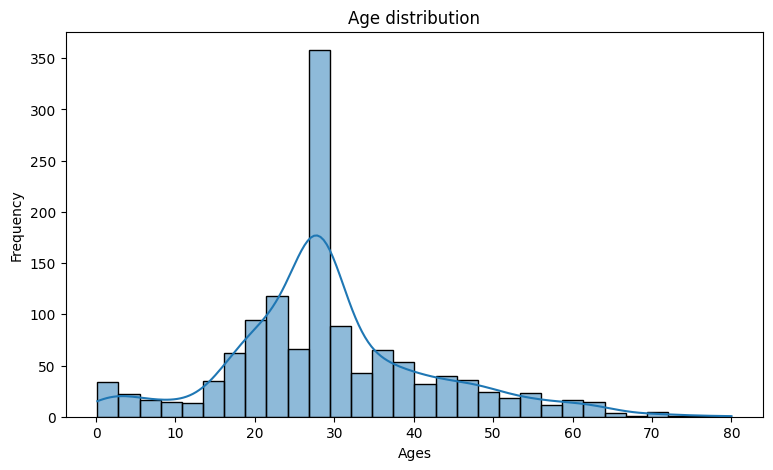

In [23]:
# Visualization of distribution of Ages

plt.figure(figsize=(9,5))

sns.histplot(df["Age"], bins = 30, kde = True)
plt.title("Age distribution")
plt.xlabel("Ages")
plt.ylabel("Frequency")
plt.show()

[]

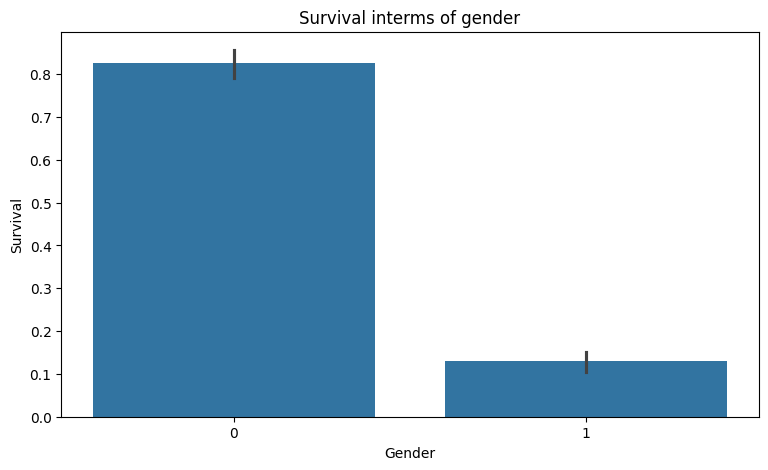

In [24]:
# survival in terms of gender

plt.figure(figsize=(9,5))

sns.barplot(x="Gender", y="Survived", data=df)
plt.title("Survival interms of gender")
plt.xlabel("Gender")
plt.ylabel("Survival")
plt.plot()

[]

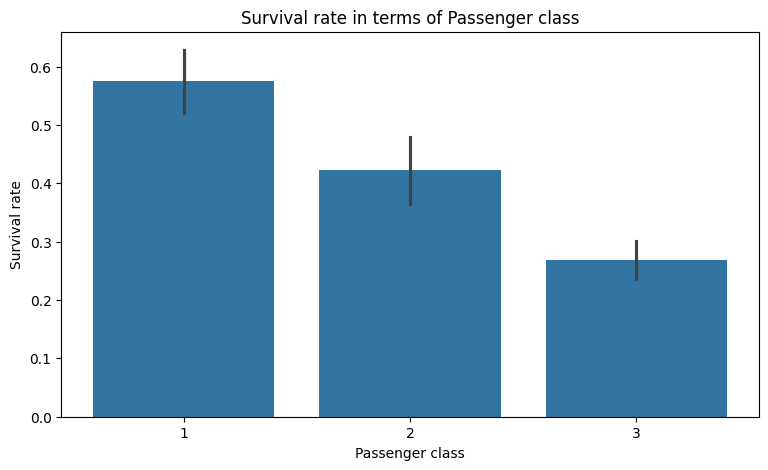

In [25]:
# Plotting survival rate in terms of passenger class

plt.figure(figsize=(9,5))

sns.barplot(x= "Pclass", y="Survived", data=df)
plt.title("Survival rate in terms of Passenger class")
plt.xlabel("Passenger class")
plt.ylabel("Survival rate")

plt.plot()

In [27]:
df_copy = df.copy()

In [29]:
df_copy.drop(columns=["Ticket"], inplace=True)
df_copy.drop(columns=["Name"], inplace=True)
df_copy.drop(columns=["Embarked"], inplace=True)

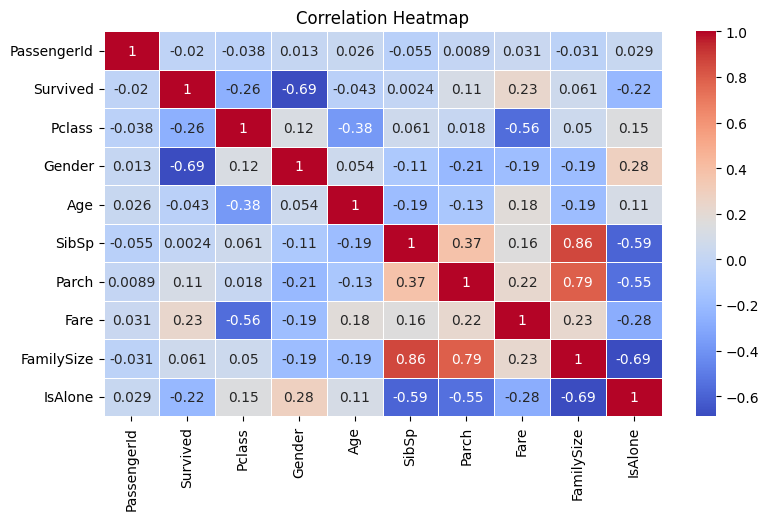

In [30]:
# Correlation heatmap

plt.figure(figsize=(9,5))
corr_matrix=df_copy.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

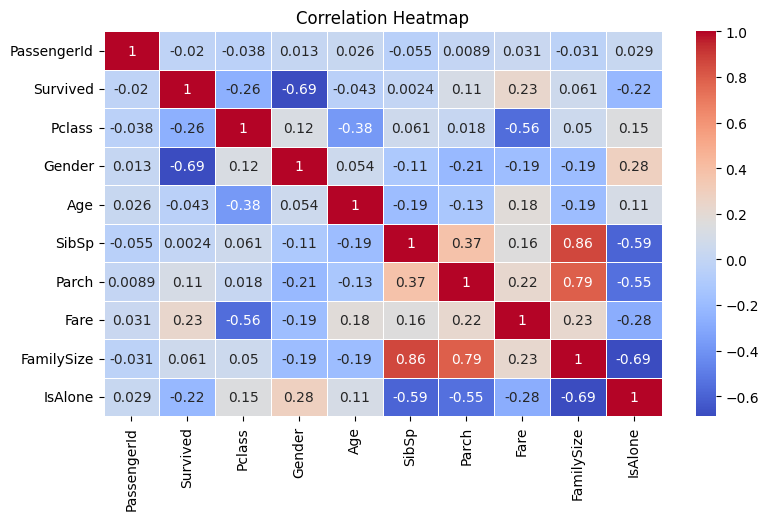

In [31]:
# Correlation heatmap

plt.figure(figsize=(9,5))
corr_matrix=df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [32]:
# Final Touches
df["AgeGroup"] = pd.cut(df["Age"],
                        bins=[0, 12, 20, 40, 60, 80],
                        labels=["0-12","13-20","21-40","41-60","61-80"])

# Convert categorical features in numerical codes
df["AgeGroup"] = df["AgeGroup"].astype("category").cat.codes
df["Embarked"] = df["Embarked"].astype("category").cat.codes

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,2,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,2,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2,0,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,1,1,2


In [34]:
features = ["Pclass", "Gender", "AgeGroup", "FamilySize", "IsAlone"]

X_df = df[features]
y_df = df["Survived"]

In [36]:
X_df.head(), y_df.head()

(   Pclass  Gender  AgeGroup  FamilySize  IsAlone
 0       3       1         2           2        0
 1       1       0         2           2        0
 2       3       0         2           1        1
 3       1       0         2           2        0
 4       3       1         2           1        1,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64)

In [37]:
# split the dataset

X_train, X_test, y_train, y_test = train_test_split(X_df,
                                                    y_df,
                                                    test_size=0.2,
                                                    random_state=42)

In [40]:
X_train.shape, y_train.shape

((1047, 5), (1047,))

In [42]:
X_test.shape, y_test.shape

((262, 5), (262,))

In [43]:
scaler = StandardScaler()

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [44]:
X_train.head()

,Pclass,Gender,AgeGroup,FamilySize,IsAlone
772,2,0,3,1,1
543,2,1,2,2,0
289,3,0,2,1,1
10,3,0,0,3,0
147,3,0,0,5,0


In [45]:
rfc = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rfc.fit(
    X_train_normalized,
    y_train
)

RandomForestClassifier(random_state=42)

In [46]:
y_preds = rfc.predict(X_test_normalized)

In [47]:
accuracy = accuracy_score(y_test, y_preds) * 100

In [49]:
print("Accuracy is: ", accuracy)

Accuracy is:  85.49618320610686


In [50]:
report = classification_report(y_test, y_preds)

In [51]:
print("Classification report: ", report)

Classification report:                precision    recall  f1-score   support

           0       0.87      0.90      0.88       159
           1       0.84      0.79      0.81       103

    accuracy                           0.85       262
   macro avg       0.85      0.84      0.85       262
weighted avg       0.85      0.85      0.85       262



<Figure size 900x500 with 0 Axes>

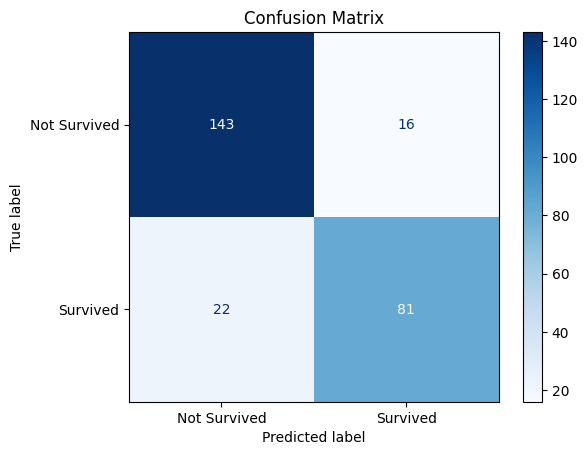

In [53]:
cm = confusion_matrix(y_test, y_preds)
cmd = ConfusionMatrixDisplay(cm, display_labels=["Not Survived", "Survived"])

plt.figure(figsize=(9,5))
cmd.plot(cmap = plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [59]:
# use another classifier

from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier()

mlp_classifier.fit(X_train_normalized, y_train)

y_preds_2 = mlp_classifier.predict(X_test_normalized)

print(accuracy_score(y_test, y_preds_2) * 100)

85.49618320610686


C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<Figure size 900x500 with 0 Axes>

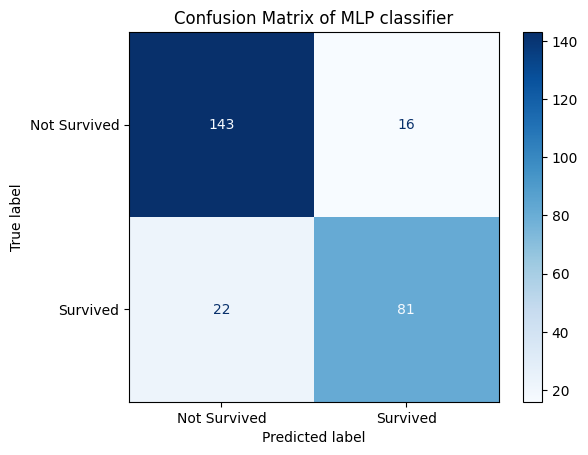

In [60]:
cm = confusion_matrix(y_test, y_preds_2)
cmd = ConfusionMatrixDisplay(cm, display_labels=["Not Survived", "Survived"])

plt.figure(figsize=(9,5))
cmd.plot(cmap = plt.cm.Blues)
plt.title("Confusion Matrix of MLP classifier")
plt.show()